In [1]:
######## Create, Train, and Predict Models

# Loads train, test, and val datasets
# Instantiates Models
# Trains Models
# Predicts using Models

Import All Required Modules

In [1]:
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')

# === STEP 0: Imports
from modules.model_manager.trainer.trainer import Trainer
from modules.model_manager.predictor.predictor import Predictor
from modules.model_manager.factories.model_factory import ModelFactory
from modules.model_manager.helpers.configuration_loader import ConfigurationLoader as MMConfigLoader
from modules.model_manager.model_manager import ModelManager
from sklearn.model_selection import KFold
from modules.data_structures.model_dataset import ModelDataset
from model_binaries.utils.binary_utils import save_entity, load_entity, cross_val_train, compute_f1, get_subset, assess_dataset_balance

2025-02-10 07:57:26.978511: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# === STEP 1: Dependency Instantiations And Global Variable Declarations

## === MODEL MANAGER
yaml_path0 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v10/model_v10_005.yaml'
yaml_paths = [yaml_path0]


checkpoint = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/models'
trainer = Trainer(checkpoint)
predictor = Predictor()
model_factory = ModelFactory()
mm_configuration_loader = MMConfigLoader()

Load Train into Memory

In [3]:
# File path to load train, test, and val datasets
train_test_val_folder_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v10"

In [4]:
train_dataset = load_entity(train_test_val_folder_path, "scaled_train.pkl")
val_dataset = load_entity(train_test_val_folder_path, "scaled_val.pkl")
test_dataset = load_entity(train_test_val_folder_path, "scaled_test.pkl")

In [5]:
assess_dataset_balance(train_dataset, ["Team_A_Wins"])

class_weight = {0: .84, 1: 1.24}


Column: 'Team_A_Wins'
  - Number of 1.0s: 12175 (59.76%)
  - Number of 0.0s: 8197 (40.24%)


Create and Train Models

In [9]:
# === STEP 4: MODEL MANAGER
yamls = [yaml_path0]
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

In [10]:
models = model_manager.create_models(yamls)
model_manager.train(models, [(train_dataset, val_dataset)], save_after_training=True)

INFO:root:Training model 'ef7773b6db527f63885350a90cbe5ebc' for 20000 epochs with batch size 32.


Epoch 1/20000
637/637 [==============================] - 4s 4ms/step - loss: 0.6987 - accuracy: 0.5439 - precision: 0.6183 - recall: 0.6186 - auc: 0.5351 - val_loss: 0.7157 - val_accuracy: 0.5601 - val_precision: 0.5783 - val_recall: 0.7323 - val_auc: 0.5546 - lr: 0.0010
Epoch 2/20000
637/637 [==============================] - 2s 3ms/step - loss: 0.6611 - accuracy: 0.5914 - precision: 0.6312 - recall: 0.7612 - auc: 0.5849 - val_loss: 0.7196 - val_accuracy: 0.5672 - val_precision: 0.5794 - val_recall: 0.7702 - val_auc: 0.5640 - lr: 0.0010
Epoch 3/20000
637/637 [==============================] - 2s 3ms/step - loss: 0.6552 - accuracy: 0.6060 - precision: 0.6406 - recall: 0.7763 - auc: 0.5998 - val_loss: 0.7221 - val_accuracy: 0.5715 - val_precision: 0.5799 - val_recall: 0.7953 - val_auc: 0.5615 - lr: 0.0010
Epoch 4/20000
637/637 [==============================] - 2s 3ms/step - loss: 0.6506 - accuracy: 0.6129 - precision: 0.6426 - recall: 0.7936 - auc: 0.6122 - val_loss: 0.7154 - val_accur

INFO:root:Model 'ef7773b6db527f63885350a90cbe5ebc': Finished training.


Model saved successfully at: models/ef7773b6db527f63885350a90cbe5ebc/model_weights_ef7773b6db527f63885350a90cbe5ebc.pth


Assess

In [11]:
predictions = models[0].predict(val_dataset.examples, return_target_labels=True)

In [12]:
predictions

,predictions,target_label
0,1.0,0.0
1,0.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
2541,1.0,1.0
2542,1.0,0.0
2543,0.0,0.0
2544,1.0,1.0


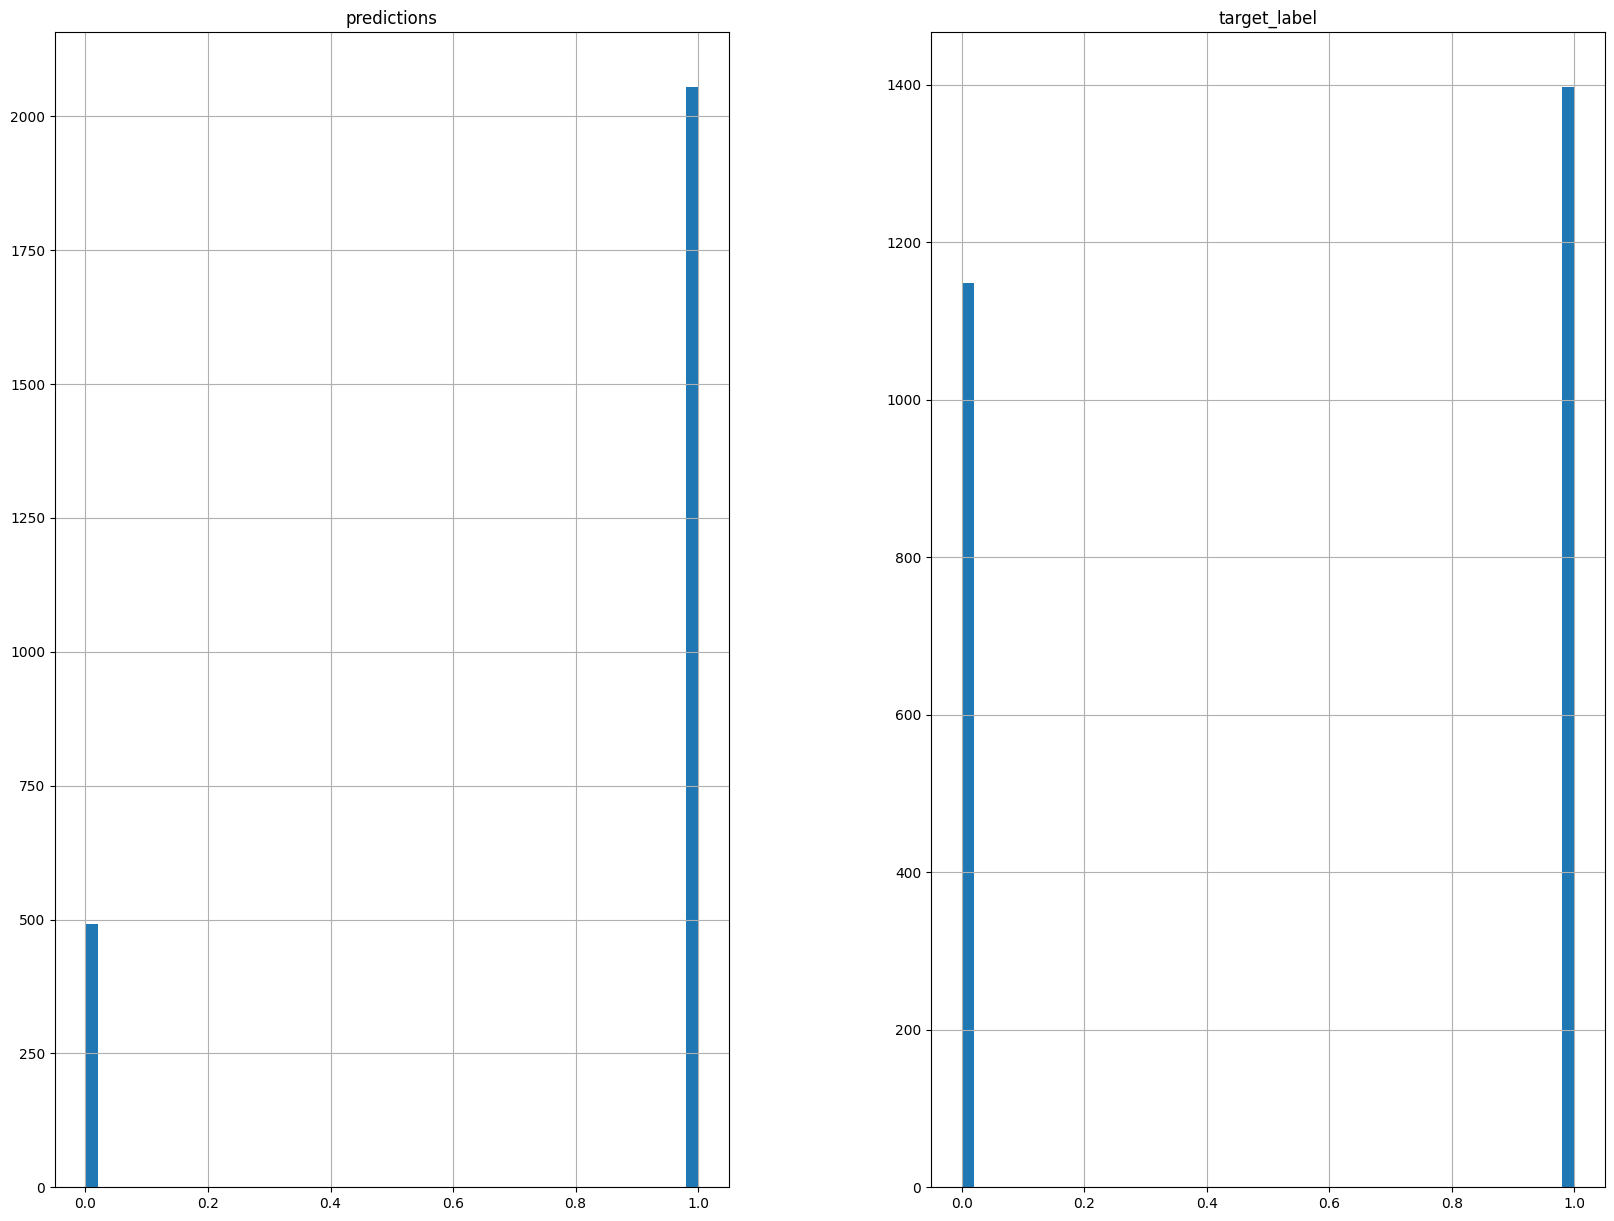

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
predictions.hist(bins=50, figsize=(20,15))
plt.show()

Launch Tensorboard

In [89]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [114]:
!kill 6006

/bin/bash: line 0: kill: (6006) - No such process


In [112]:
%reload_ext tensorboard

In [113]:
%tensorboard --logdir=./logs

Reusing TensorBoard on port 6006 (pid 12220), started 8:50:27 ago. (Use '!kill 12220' to kill it.)